# TASK 1 : Communication system with FSK modulation/demodulation. Modulate and demodulate amplitude shift keying (FSK) signal from a random binary sequence.


## 0. Configuration


### 0.1 Import libararies

In [19]:
import numpy as np  # mảng đa chiều
import matplotlib.pyplot as plt  # vẽ đồ thị
import scipy.special  # các hàm xử lý tín hiệu

### 0.2 Generate binary data sequence

In [20]:
n = 1000  # số bit của chuỗi nhị phân truyền đi
b = np.random.randint(2, size=n)  # tạo n biến nhị phân ngẫu nhiên
print(b) # in ra chuỗi nhị phân truyền đi

[0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0
 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1
 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 0
 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1
 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 1 0 1
 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1
 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 0
 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 0
 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0
 0 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1
 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 1
 0 1 0 1 0 0 0 1 1 0 0 1 

### 0.3 Initalize the parameters


In [21]:
Tb = 0.001  # thời gian truyền 1 bit
Br = 1 / Tb  # bitrate(Hz)
f_carry_0 = 5000  # tần số sóng mang thứ nhất (tần số sóng mang phải >= 2*Br)
f_carry_1 = 10000 # tần số sóng mang thứ hai (tần số sóng mang phải >= 2*Br)
t = Tb * n  # thời gian truyền tín hiệu
Spb = 100  # samples per bit (nghĩa là trong thời gian 1 bit lấy mẫu bao nhiêu lần)

## 1. Modulation


### 1.1 Generate the carrier signal


In [22]:
x = np.arange(0, t, Tb / Spb)  # x=Tb*np.arange(0,n,1/Spb)
c_0 = np.cos(2 * np.pi * f_carry_0 * x)  # c0 = cos(2pif0w)
c_1 = np.cos(2 * np.pi * f_carry_1 * x)  # c1 = cos(2pif1w)

### 1.2 Plot the carrier signal


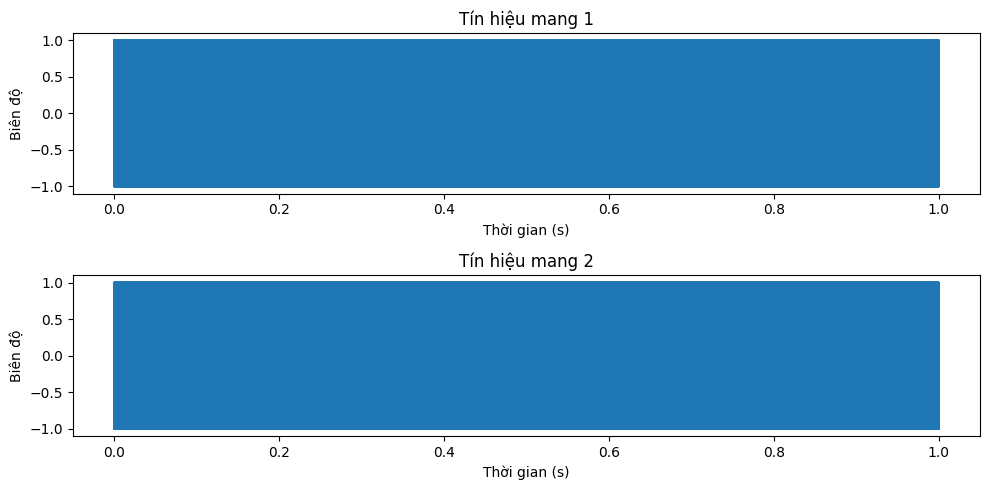

In [23]:
# Tạo figure và hai subplot
fig, (ax1, ax2) = plt.subplots(2, 1, sharey=True, figsize=(10, 5))

# Thiết lập tiêu đề, nhãn trục, và vẽ đồ thị cho subplot thứ nhất
ax1.set_title("Tín hiệu mang 1")
ax1.set_ylabel("Biên độ")
ax1.set_xlabel("Thời gian (s)")
ax1.plot(x, c_0)


# Thiết lập tiêu đề, nhãn trục, và vẽ đồ thị cho subplot thứ hai
ax2.set_title("Tín hiệu mang 2")
ax2.set_ylabel("Biên độ")
ax2.set_xlabel("Thời gian (s)")
ax2.plot(x, c_1)

# Tinh chỉnh khoảng cách giữa các subplot và hiển thị đồ thị
fig.tight_layout()
plt.show()

### 1.3 Plot the carrier signal for 1 bit period


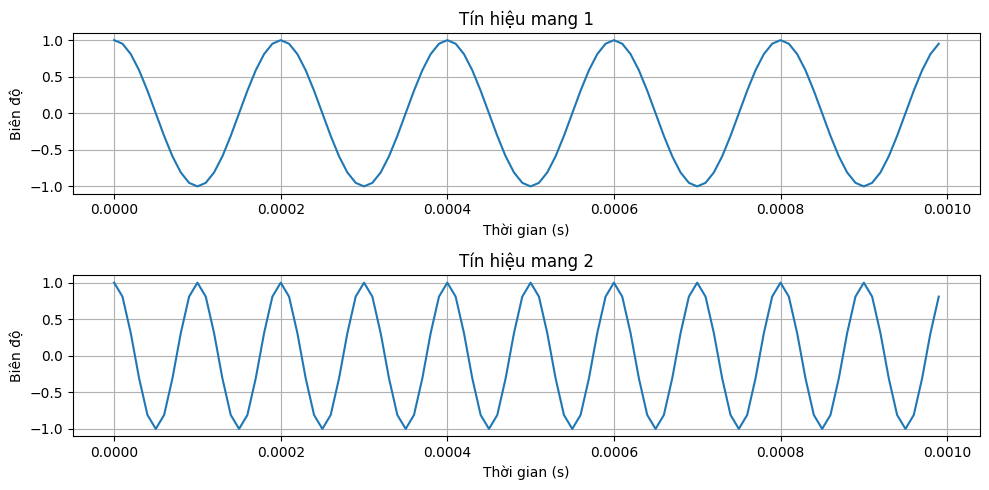

In [24]:
# Tạo một mảng thời gian để lấy mẫu trong thời gian 1 bit
t_ = Tb * np.arange(0, 1, 1 / Spb)

# Tạo figure và hai subplot
fig, (ax1, ax2) = plt.subplots(2, 1, sharey=True, figsize=(10, 5))

# Thiết lập lưới cho cả hai subplot
ax1.grid(True)
ax2.grid(True)

# Thiết lập tiêu đề, nhãn trục, và vẽ đồ thị cho subplot thứ nhất
ax1.set_title("Tín hiệu mang 1")
ax1.set_ylabel("Biên độ")
ax1.set_xlabel("Thời gian (s)")
ax1.plot(t_, np.cos(2 * np.pi * f_carry_0 * t_))

# Thiết lập tiêu đề, nhãn trục, và vẽ đồ thị cho subplot thứ hai
ax2.set_title("Tín hiệu mang 2")
ax2.set_ylabel("Biên độ")
ax2.set_xlabel("Thời gian (s)")
ax2.plot(t_, np.cos(2 * np.pi * f_carry_1 * t_))

# Tinh chỉnh khoảng cách giữa các subplot và hiển thị đồ thị
fig.tight_layout()
plt.show()

### 1.4 Plot the binary data sequence


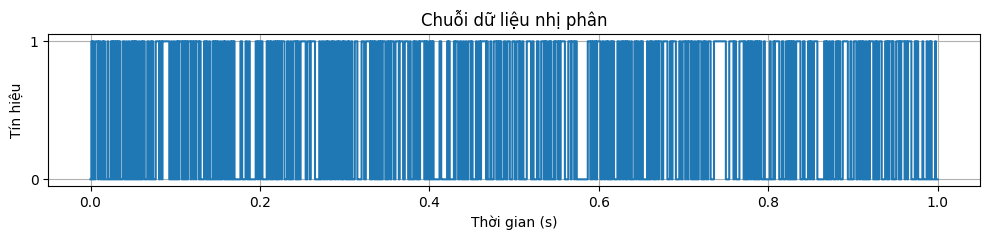

In [25]:
# Tạo dữ liệu lặp lại bit b theo số mẫu trong 1 bit (Spb)
data = np.repeat(b, Spb)

# Hoặc có thể sử dụng vòng lặp để tạo dữ liệu
# data = np.empty(shape=0, dtype=int)
# for i in range(0,n,1):
#     if b[i] == 1:
#         data =np.append(data,np.ones(Spb))
#     else:
#         data =np.append(data,np.zeros(Spb))

# Tạo figure để vẽ đồ thị
plt.figure(figsize=(10, 2.5))

# Thiết lập tiêu đề, nhãn trục và lưới cho đồ thị
plt.title("Chuỗi dữ liệu nhị phân")
plt.ylabel("Tín hiệu")
plt.xlabel("Thời gian (s)")
# plt.xticks(np.arange(0, Tb * n, Tb))
plt.yticks([0, 1])
plt.grid(True)

# Vẽ đồ thị sử dụng hàm step để tạo dạng bước
plt.step(x, data)

# Tinh chỉnh khoảng cách và hiển thị đồ thị
plt.tight_layout()
plt.show()

### 1.5 Perform modulation

In [26]:
mod = np.where(data == 0, c_0, c_1) # dạng sóng truyền đi

### 1.6 Plot the FSK modulated signal


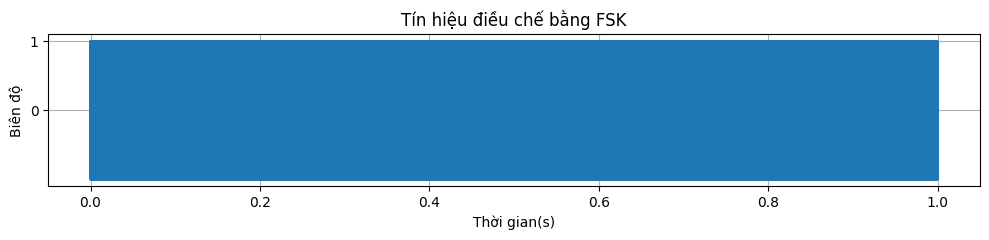

In [27]:
plt.figure(figsize=(10, 2.5))
plt.title("Tín hiệu điều chế bằng FSK")
plt.ylabel("Biên độ")
plt.xlabel("Thời gian(s)")
# plt.xticks(np.arange(0, Tb * n, Tb))
plt.yticks([0, 1])
plt.plot(x, mod)
plt.tight_layout()
plt.grid(True)
plt.show()

## 2. Demodulation


### Function to demodulate the signal


In [28]:
# hàm demolate sủ dụng phép tương quan để tạo ra các biến ra quyết định
def demodulate(mod):
    demod = np.empty(shape=n, dtype=int)
    for i in range(0, n * Spb, Spb):
        I1 = np.trapz(mod[i : i + Spb] * c_0[i : i + Spb])
        e1 = np.sum(c_0[i : i + Spb] ** 2)
        I2 = np.trapz(mod[i : i + Spb] * c_1[i : i + Spb])
        e2 = np.sum(c_1[i : i + Spb] ** 2)
        if I1 - 1 / 2 * e1 > I2 - 1 / 2 * e2:
            demod[np.floor(i / Spb).astype("int")] = 0
        else:
            demod[np.floor(i / Spb).astype("int")] = 1
    return demod

### 2.1 Obtain the demodulated binary data

In [29]:
demod = demodulate(mod)

### 2.2 Plot the demodulated binary data sequence


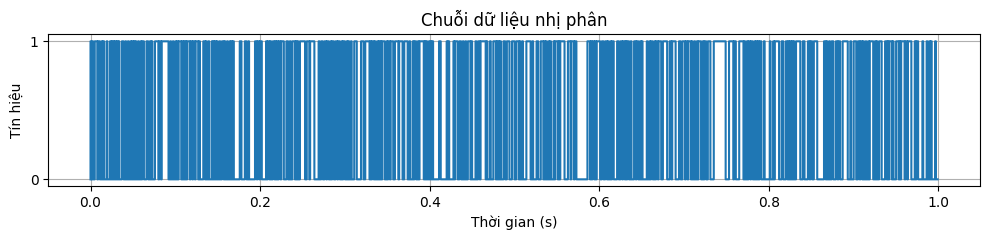

In [30]:
plt.figure(figsize=(10, 2.5))
plt.title("Chuỗi dữ liệu nhị phân")
plt.ylabel("Tín hiệu")
plt.xlabel("Thời gian (s)")
# plt.xticks(Tb * np.arange(0, n, 1))
plt.yticks([0, 1])
plt.step(Tb * np.arange(0, n, 1), demod)
plt.grid(True)
plt.tight_layout()
plt.show()

## 3. Investigate the FSK modulation/demodulation under the effects of Gaussian noise


### 3.1 Set mean and variance of AWGN and generate noise


In [31]:
mean = 0
variance = 1
noise = np.random.normal(mean, variance, size=(n * Spb,))

### 3.2 Add noise to the transmitted waveform and plot the effect of noise to the signal


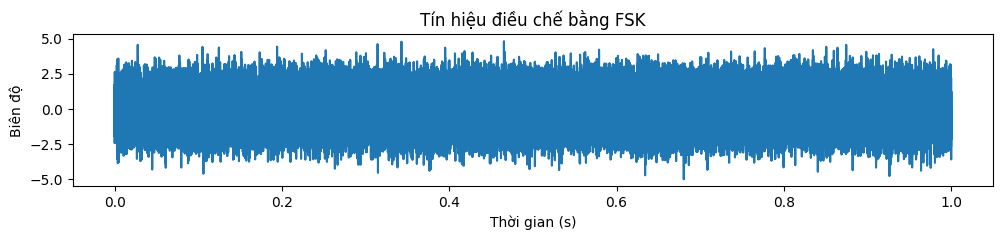

In [32]:
r = noise + mod
plt.figure(figsize=(10, 2.5))
plt.title("Tín hiệu điều chế bằng FSK")
plt.ylabel("Biên độ")
plt.xlabel("Thời gian (s)")
plt.plot(x, r)
plt.tight_layout()
plt.show()

### 3.3 FSK demodulation with AWGN


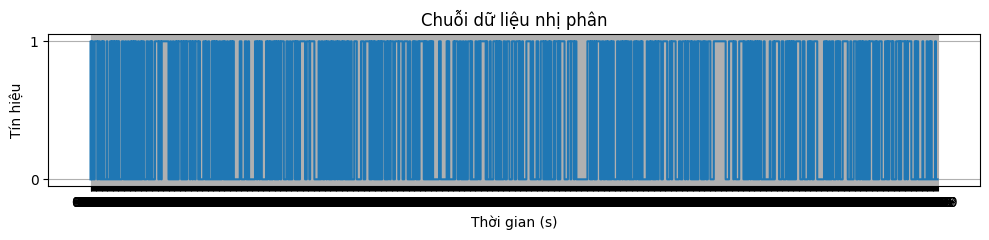

In [33]:
# demodulate the signal with AWGN
demod_noise = demodulate(r)

# plot the demodulated binary data sequence under the effect of AWGN
plt.figure(figsize=(10, 2.5))
plt.title("Chuỗi dữ liệu nhị phân")
plt.ylabel("Tín hiệu")
plt.xlabel("Thời gian (s)")
plt.xticks(Tb * np.arange(0, n, 1))
plt.yticks([0, 1])
plt.step(Tb * np.arange(0, n, 1), demod_noise)
plt.grid(True)
plt.tight_layout()
plt.show()

### 3.4 Compute the error probality numerically


In [34]:
Pb = np.count_nonzero(demod_noise - b) / len(b)
print(f"Tỉ lệ lỗi bit:{Pb*100}%")

Tỉ lệ lỗi bit:0.0%


## 4. Derive the bit error probability according to the theory


### 4.1 Generate BER simulation for 2-FSK


In [35]:
snr = np.linspace(-15, 20, 100) # Eb/N0 đo bằng dB, snr = 1/10log10(Eb/N0)
ber = np.zeros_like(snr).astype("double")
sigma = np.zeros_like(snr).astype("double") #căn(N0/2)
Eb = 1 / 2 * (np.trapz((c_0**2)[0:Spb]) + np.trapz((c_1**2)[0:Spb]))

for j in range(len(snr)):
    sigma[j] = np.sqrt(1 / 2 * Eb / (10 ** (snr[j] / 10)))
    noises = np.random.normal(0, sigma[j], size=(x.shape[0],))
    r = mod + noises
    demods = demodulate(r)
    ber[j] = np.count_nonzero(demods - b) / len(b)
print(ber)

[0.446 0.432 0.4   0.414 0.416 0.399 0.404 0.388 0.418 0.416 0.352 0.419
 0.367 0.378 0.35  0.357 0.333 0.344 0.356 0.35  0.349 0.342 0.323 0.321
 0.32  0.294 0.306 0.308 0.29  0.272 0.272 0.242 0.251 0.255 0.211 0.25
 0.222 0.195 0.214 0.19  0.178 0.147 0.156 0.144 0.152 0.12  0.118 0.122
 0.105 0.097 0.066 0.07  0.08  0.049 0.047 0.04  0.045 0.025 0.027 0.025
 0.015 0.023 0.016 0.014 0.004 0.002 0.006 0.003 0.003 0.001 0.001 0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.   ]


### 4.2 Compare BER theory and BER stimulation


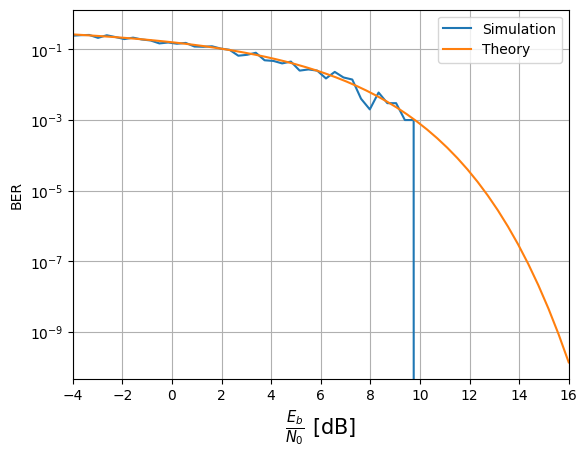

In [36]:
N0 = 2*sigma**2
xx = 10*np.log10(Eb/N0)
plt.grid()
plt.xticks(np.arange(-4, 17, 2))
plt.xlim(-4,16)
plt.xlabel(r"$\frac{E_b}{N_0}$ [dB]", size = 15)
plt.ylabel("BER")
plt.semilogy(xx, ber, label = "Simulation")
x1 = np.linspace(-4, 16) #x1 là snr
fsk = 1/2*scipy.special.erfc(np.sqrt(10**(x1/10)/2)) #10**(x1/10) là Eb/N0
plt.semilogy(x1, fsk, label = "Theory")
plt.legend()
plt.show()